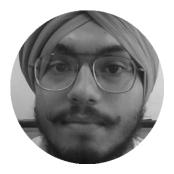

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the image
img = mpimg.imread('ld_dataset/harman.jpg')

# If the image is grayscale, convert it to RGB by stacking the grayscale values into three channels
if len(img.shape) == 2:  # Grayscale image
    img = np.stack((img,) * 3, axis=-1)

# Create a circular mask
height, width, _ = img.shape
Y, X = np.ogrid[:height, :width]
center = (width // 2, height // 2)
radius = min(center[0], center[1], width - center[0], height - center[1])
circular_mask = (X - center[0]) ** 2 + (Y - center[1]) ** 2 <= radius ** 2

# Create an RGBA image with a transparent background
img_rgba = np.zeros((height, width, 4), dtype=np.uint8)
img_rgba[:, :, :3] = img
img_rgba[:, :, 3] = circular_mask.astype(np.uint8) * 255  # Set alpha channel to the mask

# Display the image
plt.figure(figsize=(2, 2))  # Adjust the width and height as needed
plt.imshow(img_rgba)
plt.axis('off')  # Optional: turn off axis if not needed
plt.show()


# The Last Dance


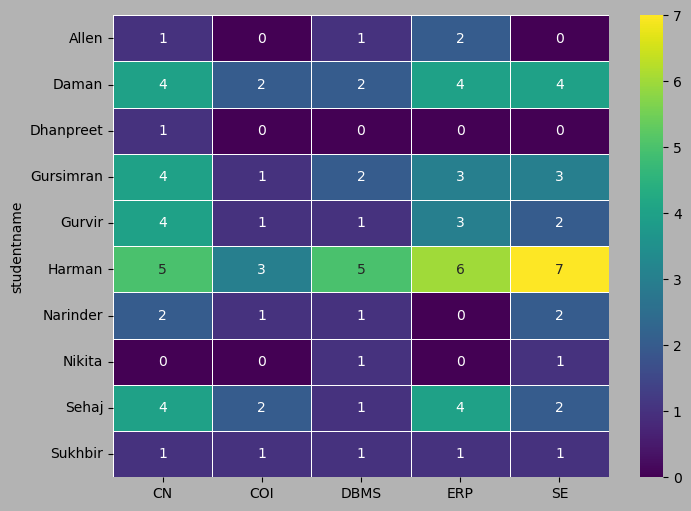

In [7]:
import customtkinter as ctk
import tkinter.messagebox as tkmb
import sqlite3

import pandas as pd #to read a excel file
import cv2

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import face_recognition
from datetime import datetime
import calendar
# import pywhatkit
import numpy as np

import os 

#------------------
%matplotlib inline
import matplotlib.image as mpimg
#------------------

ctk.set_appearance_mode("light")
ctk.set_default_color_theme("green") 
#==========================================================================================================================

class MainApplication(ctk.CTk):
    def __init__(self):
        ctk.CTk.__init__(self)
        self.title("AttendeX")
        self.geometry("1085x675")
        
        #MASTER FRAME
        self.masterframe = ctk.CTkFrame(self)
        self.masterframe.pack(padx=10, pady=10, side="left", fill="both",expand="True") 
        
        #MAIN CONTAINER        
        container = ctk.CTkFrame(self.masterframe)
        container.pack(fill="both", expand=True)

        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (ConfirmAdmin, Dashboard):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.ShowFrame(Dashboard)    #First frame to open when the app starts
    
    def ShowFrame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()  
# =========================================================================================================================

class ConfirmAdmin(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(padx=250, pady=50, side="top", fill="both",expand="True")  
                
        self.label = ctk.CTkLabel(self.frame, text=" ADMIN ", font=("Helvetica", 35))
        self.label.pack(pady=60,padx=10)

        self.admin = ctk.CTkEntry(self.frame, placeholder_text="Admin")
        self.admin.pack(padx=20, pady=20, side="top", anchor="center", fill="x")

        self.passwordframe = ctk.CTkFrame(self.frame)
        self.passwordframe.pack(padx=20, pady=20, side="top", fill="both", anchor="s")        
        self.password= ctk.CTkEntry(self.passwordframe, placeholder_text="Password", show="*")
        self.password.pack(side="left", anchor="center", fill="x", expand=True)
        self.togglebutton= ctk.CTkButton(self.passwordframe, text="SHOW", command=self.PasswordVisibility)
        self.togglebutton.pack(side="left", )  
        
        self.submit= ctk.CTkButton(self.frame, text="SUBMIT", command=self.EnableButton)
        self.submit.pack(pady=20,padx=20)         
        self.confirm= ctk.CTkButton(self.frame, text="LOGIN", state='disabled', command=lambda: controller.ShowFrame(Dashboard))
        self.confirm.pack(pady=10,padx=20) 
        
        self.show_password=False
        
#         self.bindings();
#     def bindings(self):
#         self.password.bind('enter', lambda event: self.EnableButton())
        
    def PasswordVisibility(self):
        global show_password
        self.show_password = not self.show_password
        if self.show_password:
            self.password.configure(show='')
            self.togglebutton.configure(text="HIDE")
        else:
            self.password.configure(show='*')
            self.togglebutton.configure(text="SHOW")

    def EnableButton(self):
        username = self.admin.get()
        password = self.password.get()
        if not username or not password:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            pre_username = 'admin'
            pre_password = 'harman'

            if username == pre_username and password == pre_password:
                self.confirm.configure(state='normal')
            else:
                tkmb.showerror(title="Error", message="The username or password is incorrect.\nPlease try again.")
                self.confirm.configure(state='disabled')   
# =========================================================================================================================

class Dashboard(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)

        self.masterframe = ctk.CTkFrame(self)
        self.masterframe.pack(padx=10, pady=10, side="left", fill="both",expand="True")      
        
        #MENU FRAME  (contains all the buttons for all other frames)      
        self.menuframe = ctk.CTkFrame(self.masterframe)              #, fg_color='salmon2'
        self.menuframe.pack(side="left", fill="y")
        
        self.homeBtn = ctk.CTkButton(self.menuframe, text=" HOME ", font=("Helvetica", 17), command=lambda: self.ShowFrame(home))
        self.homeBtn.pack(padx=10, pady=10, fill="x")  
        
        self.newstudentBtn = ctk.CTkButton(self.menuframe, text=" ADD STUDENT ", font=("Helvetica", 17), command=lambda: self.ShowFrame(NewStu))
        self.newstudentBtn.pack(padx=10, fill="x") 
        
        self.attSheetBtn = ctk.CTkButton(self.menuframe, text=" ATTENDANCE SHEET ", font=("Helvetica", 17), command=lambda: self.ShowFrame(attendanceSheet))
        self.attSheetBtn.pack(padx=10, pady=10, fill="x")
        
        self.starAttendanceBtn = ctk.CTkButton(self.menuframe, text=" START ATTENDANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(startAttendance))
        self.starAttendanceBtn.pack(padx=10, fill="x")        
        
        self.deleteBtn = ctk.CTkButton(self.menuframe, text=" DELETE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(delete))
        self.deleteBtn.pack(padx=10, pady=10, fill="x")  
        
        self.manualAttendanceBtn = ctk.CTkButton(self.menuframe, text=" MANUAL ATTENDANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(manual_Attendance))
        self.manualAttendanceBtn.pack(padx=10, fill="x")        
        
        self.pastActBtn = ctk.CTkButton(self.menuframe, text=" TIMELINE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(att_timeline))
        self.pastActBtn.pack(padx=10, pady=10, fill="x")  
        
        self.stu_Dtl_Btn = ctk.CTkButton(self.menuframe, text=" STUDENT DIRECTORY ", font=("Helvetica", 17), command=lambda: self.ShowFrame(student_Dtls))
        self.stu_Dtl_Btn.pack(padx=10, fill="x")        
        
        self.heatMapBtn = ctk.CTkButton(self.menuframe, text=" ATTENDANCE VIEW ", font=("Helvetica", 17), command=lambda: self.ShowFrame(heatMap))
        self.heatMapBtn.pack(padx=10, pady=10, fill="x")  
        
        #MAIN FRAME        
        self.mainframe = ctk.CTkFrame(self.masterframe)
        self.mainframe.pack(side="left", fill="both",expand="True")           
        
        #CONTAINER--2        
        container2 = ctk.CTkFrame(self.mainframe)
        container2.pack(fill="both", expand=True)
        
        container2.grid_rowconfigure(0, weight=1)
        container2.grid_columnconfigure(0, weight=1)
        
        self.frames = {}
        for F in (home, NewStu, startAttendance, delete, attendanceSheet, manual_Attendance, att_timeline, student_Dtls, heatMap):   #7 Frames,  viewStats, 
            frame = F(container2, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.ShowFrame(home)    #First frame to open when the app starts
    
        
    def ShowFrame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()  
    
# =========================================================================================================================

class home(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
               
        # Connect to the SQLite database
        conn = sqlite3.connect('ld_AttendanceSystemDb.db')
        # Create a cursor object
        cursor = conn.cursor()                   
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_studentsinfo
        # Creating the DailyAttendance table in the database if not exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS studentsinfo(
                    id INTEGER PRIMARY KEY,
                    Name TEXT,
                    Fathers_Name TEXT,
                    DOB DATE,
                    Phone TEXT,
                    Email TEXT,
                    City TEXT,
                    Gender TEXT
                )''')
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_studentsinfo 
        
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_DailyAttendance
        # Creating the DailyAttendance table in the database if not exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS DailyAttendance(
                            date DATE,
                            time TIME,
                            subject TEXT,
                            studentname TEXT,
                            month TEXT,
                            year INTEGER
                        )''')
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_DailyAttendance


        studentnames = []
        cursor.execute("SELECT Name, Phone, Email FROM studentsinfo ORDER BY Name")
        studentnames = cursor.fetchall()
        
        self.frame = ctk.CTkScrollableFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")  

        self.headframe = ctk.CTkFrame(self.frame)
        self.headframe.pack(padx=30, pady=10, side="top", anchor="w", fill="x")
        
        #Header
        self.nheadlabel = ctk.CTkLabel(self.headframe, text="STUDENT NAME", width=200, height=40, fg_color='Gray72')
        self.nheadlabel.pack(padx=5, pady=5, side="left", fill='x', expand=True)
        self.pheadlabel = ctk.CTkLabel(self.headframe, text="PHONE NUMBER", width=200, height=40, fg_color='Gray72')
        self.pheadlabel.pack(padx=5, pady=5, side="left", anchor="w")
        self.eheadlabel = ctk.CTkLabel(self.headframe, text="EMAIL ADDRESS", width=305, height=40, fg_color='Gray72')
        self.eheadlabel.pack(padx=5, pady=5, side="left", anchor="w")
        #rows
        for row in studentnames:
            self.nameframe = ctk.CTkFrame(self.frame)
            self.nameframe.pack(padx=30, side="top", anchor="w", fill="x")

            self.nLabel = ctk.CTkLabel(self.nameframe, text=row[0], width=200, height=30, fg_color='Gray82')
            self.nLabel.pack(padx=5, pady=5, side="left", fill='x', expand=True)
            self.plabel = ctk.CTkLabel(self.nameframe, text=row[1], width=200, height=30, fg_color='Gray82')
            self.plabel.pack(padx=5, pady=5, side="left", anchor="w")
            self.elabel = ctk.CTkLabel(self.nameframe, text=row[2], width=200, height=30, fg_color='Gray82')
            self.elabel.pack(padx=5, pady=5, side="left", anchor="w")  
            self.showBtn = ctk.CTkButton(self.nameframe, text=" VIEW ", font=("Helvetica", 17), fg_color='slategrey',command=lambda: self.ShowFrame(studentInfo))
            self.showBtn.pack(padx=5, pady=7, fill="x") 
        
        
        cursor.close()
        conn.close()
        
# ========================================================================================================================
class NewStu(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="NEW ADMISSION", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        self.name = ctk.CTkEntry(self.frame, placeholder_text=" Student Name")
        self.name.pack(padx=200, pady=20, side="top", fill="x")
        self.fathersname = ctk.CTkEntry(self.frame, placeholder_text=" Father's name")
        self.fathersname.pack(padx=200, pady=20, side="top", fill="x")
        self.dob = ctk.CTkEntry(self.frame, placeholder_text=" DOB (YYYY-MM-DD)")
        self.dob.pack(padx=200, pady=20, side="top", fill="x")
        self.phone = ctk.CTkEntry(self.frame, placeholder_text=" Phone (+91)")
        self.phone.pack(padx=200, pady=20, side="top", fill="x")
        self.email = ctk.CTkEntry(self.frame, placeholder_text=" E-mail")
        self.email.pack(padx=200, pady=20, side="top", fill="x")
        self.city = ctk.CTkEntry(self.frame, placeholder_text=" City")
        self.city.pack(padx=200, pady=20, side="top", fill="x")
        
        self.genderFrame = ctk.CTkFrame(self.frame)
        self.genderFrame.pack(padx=200, pady=10,  side="top", anchor="center", fill="x", expand=True)

        self.radio_var = ctk.StringVar(value="")
        self.radiobutton_1 = ctk.CTkRadioButton(self.genderFrame, text=" Male ", variable= self.radio_var, value="Male")
        self.radiobutton_1.pack(side="left")
        self.radiobutton_2 = ctk.CTkRadioButton(self.genderFrame, text=" Female ", variable= self.radio_var, value="Female")
        self.radiobutton_2.pack(side="right")
        
        self.registerBtn= ctk.CTkButton(self.frame, text="  Register  ", command=self.register)
        self.registerBtn.pack(pady="20",padx="10", side="top")
     
    def register(self):
        na = self.name.get().title()
        fa = self.fathersname.get().title()
        dtob = self.dob.get()
        ph = self.phone.get().title()
        em = self.email.get()
        cty = self.city.get().title()
        gndr = self.radio_var.get()
        
        if not na or not fa or not dtob or not ph or not em or not cty or not gndr:
            tkmb.showerror("Error", "Please fill in all the fields.")
            self.radiobutton_1.deselect()
            self.radiobutton_2.deselect()
        else:
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]
            self.radiobutton_1.deselect()
            self.radiobutton_2.deselect()
            
            # Connect to the SQLite database
            conn = sqlite3.connect('ld_AttendanceSystemDb.db')
            # Create a cursor object
            cursor = conn.cursor()
                
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ? AND Fathers_Name = ?", (na,fa))
            count = cursor.fetchone()[0]

            if count > 0:
                tkmb.showwarning(title='Warning', message=f'Student {na} already registered!')
            else:       
                cam = cv2.VideoCapture(0)
                cam.set(3, 640) # set video width
                cam.set(4, 480) # set video height
                face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
                
                # Insert data into the table
                cursor.execute("INSERT INTO studentsinfo (Name, Fathers_Name, DOB, Phone, Email, City, Gender) VALUES (?,?,?,?,?,?,?)", (na,fa,dtob,ph,em,cty,gndr))

                print("\n [INFO] Initializing face capture. Look the camera and wait ...")
                # Initialize individual sampling face count
                count = 0
                while(True):
                    ret, img = cam.read()
                    img = cv2.flip(img, 1)   
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                    faces = face_detector.detectMultiScale(gray, 1.3, 5)
                    for (x,y,w,h) in faces:
                        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
                        count += 1
                        # Save the captured image into the datasets folder
                        cv2.imwrite("ld_dataset/" + str(na) + ".jpg", gray[y:y+h,x:x+w])       
                        cv2.imshow('image', img)

                    if count >= 1:  # Take 1 face sample and stop video
                        break
                # Read data from the database into a DataFrame using pandas
                df = pd.read_sql_query("SELECT Name, Fathers_Name, DOB, Phone, Email, City, Gender FROM studentsinfo", conn)
                # Export the DataFrame to an Excel file
                df.to_excel('ld_StudentDetails.xlsx', index = False)
                
                # Do a bit of cleanup
                print("\n [INFO] Exiting Program and cleanup stuff")
                cam.release()
                cv2.destroyAllWindows()
                # Save the changes acand close the connection
                conn.commit()
                conn.close()
                tkmb.showinfo("Success", "Student registered successfully!")
#==========================================================================================================================

class startAttendance(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.label = ctk.CTkLabel(self.frame, text="ATTENDANCE TIME", font=("Helvetica", 20))
        self.label.pack(pady="10",padx="10")   
        
        self.subframe = ctk.CTkFrame(self.frame)
        self.subframe.pack(padx="10", pady="10", side="top", fill="x")  

        self.label = ctk.CTkLabel(self.subframe, text=" Subject ")
        self.label.pack(pady="20",padx="10", side="left")
        
        #list of subjects
        self.subList = ['CN', 'SE', 'DBMS', 'ERP', 'COI'] 
        self.subList_menu = ctk.CTkOptionMenu(self.subframe, values=self.subList, command=self.strtRecg, state='readonly')
        self.subList_menu.pack(padx=10, side="left", expand=True, fill='x')
        
        ins = "Attendance: Quick Guidelines\n1. Face a well-lit area with clear light on your face\n2. Stand at an arm's length from the camera.\n3. Set the camera at eye level for a direct view.\n4. Opt for a plain, uncluttered background.\n5. Remove hats or sunglasses for a clear face.\n6. Maintain a neutral expression, look into the camera.\n7. Center your face in the camera frame.\n8. Avoid strong backlight to prevent shadows.\n9. Press esc to end attendance."

        self.instruction_label = ctk.CTkLabel(self.frame, text=ins, font=("Courier New", 22), justify="left")
        self.instruction_label.pack(padx=10, pady=50)

        
    def strtRecg(self, subject):                                      
        # Connect to the database
        conn = sqlite3.connect('ld_AttendanceSystemDb.db')
        # Create a cursor object
        cursor = conn.cursor()

        known_face_names = []
        known_face_encodings = []

        cursor.execute("SELECT Name FROM studentsinfo")
        known_face_names = [row[0] for row in cursor.fetchall()]
        absentees = set(known_face_names.copy())
        #-------------------------------------------------------------------------------------------------------DETECTION

        for name in known_face_names:
            image = face_recognition.load_image_file(f'ld_dataset/{name}.jpg')
            face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(face_encoding)
        #---------------------------------------------------------------------------------------------------DETECTION OVER

        #---------------------------------------------------------------------------------------------------RECOGNITION
        # Initialize some variables
        face_locations = []
        face_encodings = []
        face_names = []
        process_this_frame = True

        # Get a reference to webcam #0 (the default one)
        cam = cv2.VideoCapture(0)

        #--------------------------------------------------------------------------------------------------------------------------
        # CURRENT_DATE : DAY - MONTH - YEAR
        now = datetime.now()
        current_date = now.strftime("%Y-%m-%d")

        # Convert the date string to a datetime object
        date_object = datetime.strptime(current_date, '%Y-%m-%d')

        # Extract the month and year from the datetime object
        month_number = date_object.month
        year = date_object.year

        # Get the month name from the month number using the calendar module
        month = calendar.month_name[month_number]

        #---------------------------------------------------------------------------------------------------------
        
        while True:
            # Grab a single frame of video
            ret, frame = cam.read()
            frame = cv2.flip(frame, 1)
            # Check if the frame is empty
            if frame is None or frame.size == 0:
                print("Error: Empty frame.")
                break
            # Only process every other frame of video to save time
            if process_this_frame:
                # Resize frame of video to 1/4 size for faster face recognition processing
                small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

                # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
                rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB) 

                # Find all the faces and face encodings in the current frame of video
                face_locations = face_recognition.face_locations(rgb_small_frame)
                face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

                face_names = []
                for face_encoding in face_encodings:
                    # See if the face is a match for the known face(s)
                    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
                    name = "Unknown"

                    # Or instead, use the known face with the smallest distance to the new face
                    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
                    best_match_index = np.argmin(face_distances)
                    if matches[best_match_index]:
                        name = known_face_names[best_match_index]

                        if name in absentees:
                            absentees.remove(name)
                            print("Absent : ", absentees)
                            # CHECK MARKING OF DUPLICATE ATTENDANCE            
                            cursor.execute("SELECT COUNT(*) FROM DailyAttendance WHERE studentname = ? AND date = ? AND subject = ?", (name, current_date, subject))
                            count = cursor.fetchone()[0]
                            if count:
                                check = tkmb.askyesno(title='Confirmation', message=f'Is this {count + 1}nd {subject} class for the day?')
                                if check:
                                    current_time = now.strftime("%H:%M:%S")
                                    print(f"Marking attendance again : {name}")
                                    cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,name,month,year))  
            
                                else:
                                    tkmb.showinfo(title='Attendance Already Marked', message=f"{name}'s attendance is already marked for \nsubject {subject}, date {current_date}")

                            else:
                                current_time = now.strftime("%H:%M:%S")
                                print(f"Marking attendance : {name}")
                                cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,name,month,year))                        

                    face_names.append(name) 

            #Display the results
            for (top, right, bottom, left), name in zip(face_locations, face_names):
                # Scale back up face locations since the frame we detected in was scaled to 1/4 size
                top *= 4
                right *= 4
                bottom *= 4
                left *= 4

                cv2.rectangle(frame, (left, top), (right, bottom), (255,100,255), 2)
                cv2.putText(frame, name, (left + 6, bottom + 28), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)
            # Display the resulting image
            cv2.imshow('AttendeX', frame)

            # Hit 'esc' on the keyboard to quit!
            if cv2.waitKey(1) & 0xFF == 27:
                break
        # Release handle to the webcam
        cam.release()
        cv2.destroyAllWindows()

        # Read data from the database into a DataFrame using pandas
        df = pd.read_sql_query("SELECT * FROM DailyAttendance", conn)
        # Export the DataFrame to a particular sheet in the Excel file
#         file_name = 'StudentAttendanceRecord.xlsx'
#         sheet_name = 'Sheet1' 
#         df.to_excel(file_name, sheet_name=sheet_name, index=False)
        df.to_excel('ld_StudentAttendanceRecord.xlsx', index = False)

        # Save the changes
        conn.commit()
        conn.close()


# =========================================================================================================================

class delete(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.label = ctk.CTkLabel(self.frame, text="DELETE RECORD", font=("Helvetica", 20))
        self.label.pack(padx="10",pady="10")
   
        self.deleteName=ctk.CTkEntry(self.frame, placeholder_text="Student Name")
        self.deleteName.pack(padx="30", pady="20", side="top", fill="x")        
        self.deleteButton= ctk.CTkButton(self.frame, text="Delete Record", command= self.delRecord)
        self.deleteButton.pack(pady="10",padx="20")
        self.deleteButton.configure(hover_color="red4")
             
    def delRecord(self):
        delNa = self.deleteName.get()
        if not delNa:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:           
            # Connect to the SQLite database
            conn = sqlite3.connect('ld_AttendanceSystemDb.db')
            cursor = conn.cursor()

            deleteName = self.deleteName.get().title()
            
            # Check if student exists in the table
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ?", (deleteName,))
            count = cursor.fetchone()[0]

            if count > 0:
                check = tkmb.askyesno(title='Delete Record', message=f'Delete {deleteName} permanently?')
                if check:
                    cursor.execute("DELETE FROM studentsinfo WHERE Name = ?", (deleteName,))

                    # Commit the changes
                    conn.commit()
                    print(f"Record for {deleteName} has been deleted from the database.")

                    # Read data from the database into a DataFrame using pandas
                    df = pd.read_sql_query("SELECT * FROM studentsinfo", conn)
                    # Export the DataFrame to a particular sheet in the Excel file
                    file_name = 'ld_StudentDetails.xlsx'
                    sheet_name = 'Sheet1'
                    df.to_excel(file_name, sheet_name=sheet_name, index=False)

                    imgDelete = f'FaceRecognitionProject/ld_dataset/{deleteName}.jpg'
                    self.delete_img(imgDelete)
                    tkmb.showinfo(title="Record Deleted Successfully", message=f"Record for {deleteName} has been deleted.")            
            else:
                tkmb.showerror(title="Deletion failed", message=f"{deleteName} does not exist in records. No record deleted.")   
            # Close the connection
            conn.close()
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]            
        
    def delete_img(self, photo_path):
        try:
            os.remove(photo_path)
            print(f"Photo {photo_path} deleted successfully.")   
        except FileNotFoundError:
            print(f"Photo {photo_path} not found.")
        except PermissionError:
            print(f"Permission error while trying to delete {photo_path}.")
        except Exception as e:
            print(f"An error occurred while trying to delete {photo_path}: {e}")
# =========================================================================================================================

class attendanceSheet(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.label = ctk.CTkLabel(self.frame, text="ATTENDANCE SHEET", font=("Helvetica", 20))
        self.label.pack(pady="10",padx="10")
        #refresh_button
        self.refreshButton= ctk.CTkButton(self.frame, text="REFRESH", command= self.open_attendance_sheet)
        self.refreshButton.pack(side="top", pady="10",padx="20")

        
        self.text_widget = ctk.CTkTextbox(self.frame, wrap="word", font=("Courier New", 23))
        self.text_widget.pack(side="left", fill="both", expand=True, padx="10", pady="5")  
        
        self.open_attendance_sheet()
        
    def open_attendance_sheet(self):

        # Connect to the SQLite database
        conn = sqlite3.connect('ld_AttendanceSystemDb.db')
        cursor = conn.cursor()
        
        query = "SELECT studentname, subject, COUNT(*) AS attendance_count FROM DailyAttendance GROUP BY studentname, subject"
        cursor.execute(query)
        results = cursor.fetchall()    
        # Create a DataFrame from the SQL results
        df = pd.DataFrame(results, columns=['studentname', 'subject', 'attendance_count'])        
        
        df = df.pivot(index='studentname', columns='subject', values='attendance_count')

        # Reset the index for a cleaner output
        df.reset_index(inplace=True)

        # Fill NaN values with 0 (in case a student didn't attend a subject)
        df = df.fillna(0)
        
        df.to_excel('ld_SubjectWiseAtt.xlsx', index = False)      
        file_path = "ld_SubjectWiseAtt.xlsx"
        try:
            df = pd.read_excel(file_path)
            self.show_excel_data(df)
        except Exception as e:
            self.text_widget.delete(1.0, ctk.END)
            self.text_widget.insert(ctk.END, f"Error: {e}")
        
        cursor.close()
        conn.close()    
        
    def show_excel_data(self, df):
        self.text_widget.delete(1.0, ctk.END)
        self.text_widget.insert(ctk.END, df.to_string(index=False)) 
        
# ======================================================================================================================== 

class manual_Attendance(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="MANUAL ATTENDANCE", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        self.name = ctk.CTkEntry(self.frame, placeholder_text=" Student Name")
        self.name.pack(padx=200, pady=20, side="top", fill="x")
        
        self.subframe = ctk.CTkFrame(self.frame)
        self.subframe.pack(padx="10", pady="10", side="top", fill="x")  

        self.label = ctk.CTkLabel(self.subframe, text=" Subject ")
        self.label.pack(pady="20",padx="10", side="left")
    
        #list of subjects
        self.subList = ['CN', 'SE', 'DBMS', 'ERP', 'COI'] 
        self.subList_menu = ctk.CTkOptionMenu(self.subframe, values=self.subList, command=self.mnlAtt, state='readonly')
        self.subList_menu.pack(padx=10, side="left", expand=True, fill='x')      
        
    def mnlAtt(self, subject):
        na = self.name.get().title()
        if not na :
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            #//////DATABASE
            conn = sqlite3.connect('ld_AttendanceSystemDb.db')
            cursor = conn.cursor()            
            
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ?", (na,))
            chk = cursor.fetchone()[0]

            if chk > 0:
                #Mark Attendance

                # CURRENT_DATE : DAY - MONTH - YEAR
                now = datetime.now()
                current_date = now.strftime("%Y-%m-%d")
                # Convert the date string to a datetime object
                date_object = datetime.strptime(current_date, '%Y-%m-%d')
                # Extract the month and year from the datetime object
                month_number = date_object.month
                year = date_object.year
                # Get the month name from the month number using the calendar module
                month = calendar.month_name[month_number]

                # CHECK MARKING OF DUPLICATE ATTENDANCE            
                cursor.execute("SELECT COUNT(*) FROM DailyAttendance WHERE studentname = ? AND date = ? AND subject = ?", (na, current_date, subject))
                count = cursor.fetchone()[0]
                if count:
                    check = tkmb.askyesno(title='Confirmation', message=f'Is this {count + 1}nd {subject} class for the day?')
                    if check:
                        current_time = now.strftime("%H:%M:%S")
                        print(f"Marking attendance again : {na}")
                        cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,na,month,year))  
                        tkmb.showinfo(title="Attendance Marked", message=f"{na}'s attendance marked for \nsubject {subject}, date {current_date} manually.")
                    else:
                        tkmb.showinfo(title="Attendance Already Marked", message=f"{na}'s attendance is already marked for \nsubject {subject}, date {current_date}")

                else:
                    current_time = now.strftime("%H:%M:%S")
                    print(f"Marking attendance : {na}")
                    cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,na,month,year))
                    tkmb.showinfo(title="Attendance Marked", message=f"{na}'s attendance marked for \nsubject {subject}, date {current_date} manually.")
                    
                # Read data from the database into a DataFrame using pandas
                df = pd.read_sql_query("SELECT * FROM DailyAttendance", conn)
                df.to_excel('ld_StudentAttendanceRecord.xlsx', index = False)

            else: 
                #No student found of NAME
                tkmb.showerror(title="Attendance failed", message=f"{na} does not exist in records.")   
            
            # Close the connection
            conn.commit()
            cursor.close()
            conn.close()
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]    
# ========================================================================================================================

class att_timeline(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="ATTENDANCE TIMELINE", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        #refresh_button
        self.refreshButton= ctk.CTkButton(self.frame, text="REFRESH", command= self.open_attendance_sheet)
        self.refreshButton.pack(side="top", pady="10",padx="20")
        
        self.scrollbar = ctk.CTkScrollbar(self.frame, orientation=ctk.VERTICAL)
        self.text_widget = ctk.CTkTextbox(self.frame, wrap="word", font=("Courier New", 23), yscrollcommand=self.scrollbar.set)
        self.text_widget.pack(side="top", fill="both", expand=True, padx="10", pady="5")
        
        self.open_attendance_sheet()
        
    def open_attendance_sheet(self):
        file_path = "ld_StudentAttendanceRecord.xlsx"
        try:
            df = pd.read_excel(file_path)
            self.show_excel_data(df)
        except Exception as e:
            self.text_widget.delete(1.0, ctk.END)
            self.text_widget.insert(ctk.END, f"Error: {e}")
    def show_excel_data(self, df):
        self.text_widget.delete(1.0, ctk.END)
        self.text_widget.insert(ctk.END, df.to_string(index=False))         
# ========================================================================================================================

class student_Dtls(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="STUDENTS DETAIL", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        #refresh_button
        self.refreshButton= ctk.CTkButton(self.frame, text="REFRESH", command= self.open_sheet)
        self.refreshButton.pack(side="top", pady="10",padx="20")
        
        self.scrollbar = ctk.CTkScrollbar(self.frame, orientation=ctk.VERTICAL)
        self.text_widget = ctk.CTkTextbox(self.frame, wrap="word", font=("Courier New", 13), fg_color="Gray86", yscrollcommand=self.scrollbar.set)
        self.text_widget.pack(side="top", fill="both", expand=True, padx="10", pady="5")
        
        self.open_sheet()

    def open_sheet(self):
        file_path = "ld_StudentDetails.xlsx"
        try:
            df = pd.read_excel(file_path)
            self.show_excel_data(df)
        except Exception as e:
            self.text_widget.delete(1.0, ctk.END)
            self.text_widget.insert(ctk.END, f"Error: {e}")
    def show_excel_data(self, df):
        self.text_widget.delete(1.0, ctk.END)
        self.text_widget.insert(ctk.END, df.to_string(index=False))         
# ========================================================================================================================# ========================================================================================================================

class heatMap(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="ATTENDANCE VIEW", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        #refresh_button
        self.refreshButton= ctk.CTkButton(self.frame, text="REFRESH", command= self.update_map)
        self.refreshButton.pack(side="top", pady="10",padx="20")

        self.canvas_widget = None
        
        self.gen_map()
        
    def gen_map(self):
        excel_file_path = 'ld_SubjectWiseAtt.xlsx'
        df = pd.read_excel(excel_file_path, index_col=0)
        
        # Create a heatmap using Seaborn
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(df, cmap='viridis', annot=True, fmt="0", linewidths=.5, ax=ax)
                
        # Rotate y-axis labels
        plt.yticks(rotation=0)
        
        fig.patch.set_facecolor('#B3B3B3')  # Change to the desired background color
        ax.set_facecolor('#B3B3B3')

        # Embed the Matplotlib figure in the Tkinter frame
        canvas = FigureCanvasTkAgg(fig, self.frame)
        self.canvas_widget = canvas.get_tk_widget()
        self.canvas_widget.pack(padx=0, anchor='center')
        
    
    def update_map(self):
        # Clear the existing heatmap
        if self.canvas_widget:
            self.canvas_widget.destroy()

        # Generate and display the updated heatmap
        self.gen_map()
            
# ========================================================================================================================
#************************************************************************************************************************
app = MainApplication()
app.mainloop() 

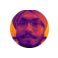

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('ld_dataset/harman.jpg')


# Convert the image to RGB using a colormap
colormap = plt.cm.inferno  # You can choose different colormaps like 'viridis', 'plasma', 'inferno', etc.
img_color = colormap(img)[:, :, :3]  # Apply colormap and ignore the alpha channel

# Create a circular mask
height, width, _ = img_color.shape
Y, X = np.ogrid[:height, :width]
center = (width // 2, height // 2)
radius = min(center[0], center[1], width - center[0], height - center[1])
circular_mask = (X - center[0]) ** 2 + (Y - center[1]) ** 2 <= radius ** 2

# Create an RGBA image with a transparent background
img_rgba = np.zeros((height, width, 4), dtype=np.float32)
img_rgba[:, :, :3] = img_color
img_rgba[:, :, 3] = circular_mask.astype(np.float32)  # Set alpha channel to the mask

# Display the image
plt.figure(figsize=(0.5, 0.5))  # Adjust the width and height as needed
plt.imshow(img_rgba)
plt.axis('off')  # Optional: turn off axis if not needed
plt.show()

In [7]:
import tkinter as tk
from PIL import Image, ImageTk

def display_images(image_paths, grid_size):
    # Initialize Tkinter root window
    root = tk.Tk()
    root.title("Multiple Image Display")

    # List to hold references to PhotoImage objects
    photo_images = []

    # Create labels for each image and pack them into the root window
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        img = img.resize((200, 200), Image.LANCZOS)  # Resize the image
        img_tk = ImageTk.PhotoImage(img)

        # Keep a reference to the PhotoImage object
        photo_images.append(img_tk)

        row = i // grid_size[1]
        col = i % grid_size[1]

        label = tk.Label(root, image=img_tk)
        label.grid(row=row, column=col, padx=10, pady=10)  # Use grid layout with padding

        # Ensure the image is retained by keeping a reference in the label
        label.img = img_tk

    # Keep a reference to the root window to prevent it from being garbage collected
    root.mainloop()

# List of image paths
image_paths = ['ld_dataset/Harman.jpg', 'ld_dataset/Allen.jpg', 'ld_dataset/Daman.jpg', 'ld_dataset/Sukhbir.jpg']

# Grid size (rows x columns)
grid_size = (2, 2)

# Display the images
display_images(image_paths, grid_size)





TclError: image "pyimage6" doesn't exist

In [15]:
import tkinter as tk

class SampleApp(tk.Tk):
    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)
        self.title("Frame Transitions Example")
        self.frames = {}

        # Create three sample frames: StartPage, PageOne, and PageTwo
        for F in (StartPage, PageOne, PageTwo):
            page_name = F.__name__
            frame = F(parent=self, controller=self)
            self.frames[page_name] = frame
            frame.grid(row=0, column=0, sticky="nsew")

        # Show the StartPage initially
        self.show_frame("StartPage")

    def show_frame(self, page_name):
        """Show a frame for the given page name"""
        frame = self.frames[page_name]
        frame.tkraise()

class StartPage(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self, text="This is the start page")
        label.pack(side="top", fill="x", pady=10)
        button1 = tk.Button(self, text="Go to Page One", command=lambda: controller.show_frame("PageOne"))
        button2 = tk.Button(self, text="Go to Page Two", command=lambda: controller.show_frame("PageTwo"))
        button1.pack()
        button2.pack()

class PageOne(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self, text="This is Page One")
        label.pack(side="top", fill="x", pady=10)
        button1 = tk.Button(self, text="Go to StartPage", command=lambda: controller.show_frame("StartPage"))
        button2 = tk.Button(self, text="Go to Page Two", command=lambda: controller.show_frame("PageTwo"))
        button1.pack()
        button2.pack()

class PageTwo(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        label = tk.Label(self, text="This is Page Two")
        label.pack(side="top", fill="x", pady=10)
        button1 = tk.Button(self, text="Go to StartPage", command=lambda: controller.show_frame("StartPage"))
        button2 = tk.Button(self, text="Go to Page One", command=lambda: controller.show_frame("PageOne"))
        button1.pack()
        button2.pack()

if __name__ == "__main__":
    app = SampleApp()
    app.mainloop()


# theLastDance_2-Backup

In [10]:
import customtkinter as ctk
import tkinter.messagebox as tkmb
import sqlite3

import pandas as pd #to read a excel file
import cv2

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import face_recognition
from datetime import datetime
import calendar
import pywhatkit
import numpy as np

ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue") 
#==========================================================================================================================

class MainApplication(ctk.CTk):
    def __init__(self):
        ctk.CTk.__init__(self)
        self.title("AttendeX")
        self.geometry("1225x675")
        
        #MASTER FRAME
        self.masterframe = ctk.CTkFrame(self)
        self.masterframe.pack(padx=10, pady=10, side="left", fill="both",expand="True") 
        
        #MAIN CONTAINER        
        container = ctk.CTkFrame(self.masterframe)
        container.pack(fill="both", expand=True)

        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (ConfirmAdmin, Dashboard):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.ShowFrame(ConfirmAdmin)    #First frame to open when the app starts
    
    def ShowFrame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()  
# =========================================================================================================================

class ConfirmAdmin(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(padx=300, pady=50, side="top", fill="both",expand="True")  
                
        self.label = ctk.CTkLabel(self.frame, text=" ADMIN ", font=("Helvetica", 35))
        self.label.pack(pady=60,padx=10)

        self.admin = ctk.CTkEntry(self.frame, placeholder_text="Admin")
        self.admin.pack(padx=20, pady=20, side="top", anchor="center", fill="x")

        self.passwordframe = ctk.CTkFrame(self.frame)
        self.passwordframe.pack(padx=20, pady=20, side="top", fill="both", anchor="s")        
        self.password= ctk.CTkEntry(self.passwordframe, placeholder_text="Password", show="*")
        self.password.pack(side="left", anchor="center", fill="x", expand=True)
        self.togglebutton= ctk.CTkButton(self.passwordframe, text="SHOW", command=self.PasswordVisibility)
        self.togglebutton.pack(side="left", )  
        
        self.submit= ctk.CTkButton(self.frame, text="SUBMIT", command=self.EnableButton)
        self.submit.pack(pady=20,padx=20)         
        self.confirm= ctk.CTkButton(self.frame, text="LOGIN", state='disabled', command=lambda: controller.ShowFrame(Dashboard))
        self.confirm.pack(pady=10,padx=20) 
        
        self.show_password=False    
    def PasswordVisibility(self):
        global show_password
        self.show_password = not self.show_password
        if self.show_password:
            self.password.configure(show='')
            self.togglebutton.configure(text="HIDE")
        else:
            self.password.configure(show='*')
            self.togglebutton.configure(text="SHOW")

    def EnableButton(self):
        username = self.admin.get()
        password = self.password.get()
        if not username or not password:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            pre_username = 'admin'
            pre_password = 'harman'

            if username == pre_username and password == pre_password:
                self.confirm.configure(state='normal')
            else:
                tkmb.showerror(title="Error", message="The username or password is incorrect.\nPlease try again.")
                self.confirm.configure(state='disabled')   
# =========================================================================================================================

class Dashboard(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)

        self.masterframe = ctk.CTkFrame(self)
        self.masterframe.pack(padx=10, pady=10, side="left", fill="both",expand="True")      
        
        #MENU FRAME  (contains all the buttons for all other frames)      
        self.menuframe = ctk.CTkFrame(self.masterframe)              #, fg_color='salmon2'
        self.menuframe.pack(side="left", fill="y")
        
        self.homeBtn = ctk.CTkButton(self.menuframe, text=" HOME ", font=("Helvetica", 17), command=lambda: self.ShowFrame(home))
        self.homeBtn.pack(padx=10, pady=10, fill="x")  
        
        self.newstudentBtn = ctk.CTkButton(self.menuframe, text=" NEW STUDENT ", font=("Helvetica", 17), command=lambda: self.ShowFrame(NewStu))
        self.newstudentBtn.pack(padx=10, fill="x") 
        
        self.attSheetBtn = ctk.CTkButton(self.menuframe, text=" ATTENDANCE SHEET ", font=("Helvetica", 17), command=lambda: self.ShowFrame(attendanceSheet))
        self.attSheetBtn.pack(padx=10, pady=10, fill="x")
        
        self.starAttendanceBtn = ctk.CTkButton(self.menuframe, text=" START ATTENDANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(startAttendance))
        self.starAttendanceBtn.pack(padx=10, fill="x")     
        
#         self.statsBtn = ctk.CTkButton(self.menuframe, text=" STUDENT PERFORMANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(viewStats))
#         self.statsBtn.pack(padx=10, pady=10, fill="x")      
        
        self.deleteBtn = ctk.CTkButton(self.menuframe, text=" DELETE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(delete))
        self.deleteBtn.pack(padx=10, pady=10, fill="x")  
        
        self.manualAttendanceBtn = ctk.CTkButton(self.menuframe, text=" MANUAL ATTENDANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(manual_Attendance))
        self.manualAttendanceBtn.pack(padx=10, fill="x")    
        
        #MAIN FRAME        
        self.mainframe = ctk.CTkFrame(self.masterframe)
        self.mainframe.pack(side="left", fill="both",expand="True")
        
#         #TOP FRAME (dummy : not in use)        
#         self.topframe = ctk.CTkFrame(self.mainframe)
#         self.topframe.pack(side="top", fill="x")  
#         self.findStudEntry = ctk.CTkEntry(self.topframe, placeholder_text="Search student by name or roll no")
#         self.findStudEntry.pack(padx=10, pady=10, side="left", fill="x", expand=True)
#         self.searchBtn = ctk.CTkButton(self.topframe, text=" SEARCH ", command=lambda: self.ShowFrame(ConfirmAdmin))
#         self.searchBtn.pack(pady=10,padx=10, side="left", expand=True)           
        
        #CONTAINER        
        container2 = ctk.CTkFrame(self.mainframe)
        container2.pack(fill="both", expand=True)
        
        container2.grid_rowconfigure(0, weight=1)
        container2.grid_columnconfigure(0, weight=1)
        
        self.frames = {}
        for F in (home, NewStu, delete, attendanceSheet, startAttendance, manual_Attendance):                      #6 Frames,  viewStats, 
            frame = F(container2, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.ShowFrame(home)    #First frame to open when the app starts
        
    def ShowFrame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()  
# =========================================================================================================================

class NewStu(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="NEW ADMISSION", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        self.name = ctk.CTkEntry(self.frame, placeholder_text=" Student Name")
        self.name.pack(padx=300, pady=20, side="top", fill="x")
        self.fathersname = ctk.CTkEntry(self.frame, placeholder_text=" Father's name")
        self.fathersname.pack(padx=300, pady=20, side="top", fill="x")
        self.dob = ctk.CTkEntry(self.frame, placeholder_text=" DOB (YYYY-MM-DD)")
        self.dob.pack(padx=300, pady=20, side="top", fill="x")
        self.phone = ctk.CTkEntry(self.frame, placeholder_text=" Phone (+91)")
        self.phone.pack(padx=300, pady=20, side="top", fill="x")
        self.email = ctk.CTkEntry(self.frame, placeholder_text=" E-mail")
        self.email.pack(padx=300, pady=20, side="top", fill="x")
        self.city = ctk.CTkEntry(self.frame, placeholder_text=" City")
        self.city.pack(padx=300, pady=20, side="top", fill="x")
        
        self.genderFrame = ctk.CTkFrame(self.frame)
        self.genderFrame.pack(padx=300, pady=20,  side="top", anchor="center", fill="x", expand=True)

        self.radio_var = ctk.StringVar(value="")
        self.radiobutton_1 = ctk.CTkRadioButton(self.genderFrame, text=" Male ", variable= self.radio_var, value="Male")
        self.radiobutton_1.pack(side="left")
        self.radiobutton_2 = ctk.CTkRadioButton(self.genderFrame, text=" Female ", variable= self.radio_var, value="Female")
        self.radiobutton_2.pack(side="right")
        
        self.registerBtn= ctk.CTkButton(self.frame, text="  Register  ", command=self.register)
        self.registerBtn.pack(pady="20",padx="20", side="top")
     
    def register(self):
        na = self.name.get().title()
        fa = self.fathersname.get().title()
        dtob = self.dob.get()
        ph = self.phone.get().title()
        em = self.email.get()
        cty = self.city.get().title()
        gndr = self.radio_var.get()

        
       
        if not na or not fa or not dtob or not ph or not em or not cty or not gndr:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]
            self.radiobutton_1.deselect()
            self.radiobutton_2.deselect()
            
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ? AND Fathers_Name = ?", (na,fa))
            count = cursor.fetchone()[0]

            if count > 0:
                tkmb.showwarning(title='Warning', message=f'Student {na} already registered!')
            else:       
                cam = cv2.VideoCapture(0)
                cam.set(3, 640) # set video width
                cam.set(4, 480) # set video height
                face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

                # Connect to the SQLite database
                conn = sqlite3.connect('AttendanceSystemDb.db')
                # Create a cursor object
                cursor = conn.cursor()                   
                #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_studentsinfo
                # Creating the DailyAttendance table in the database if not exist
                cursor.execute('''CREATE TABLE IF NOT EXISTS studentsinfo(
                            id INTEGER PRIMARY KEY,
                            Name TEXT,
                            Fathers_Name TEXT,
                            DOB DATE,
                            Phone TEXT,
                            Email TEXT,
                            City TEXT,
                            Gender TEXT
                        )''')
                #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_studentsinfo
                
                # Insert data into the table
                cursor.execute("INSERT INTO studentsinfo (Name, Fathers_Name, DOB, Phone, Email, City, Gender) VALUES (?,?,?,?,?,?,?)", (na,fa,dtob,ph,em,cty,gndr))

                print("\n [INFO] Initializing face capture. Look the camera and wait ...")
                # Initialize individual sampling face count
                count = 0
                while(True):
                    ret, img = cam.read()
                    img = cv2.flip(img, 1)   
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                    faces = face_detector.detectMultiScale(gray, 1.3, 5)
                    for (x,y,w,h) in faces:
                        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
                        count += 1
                        # Save the captured image into the datasets folder
                        cv2.imwrite("FaceRecognitionProject/dataset/" + str(na) + ".jpg", gray[y:y+h,x:x+w])       
                        cv2.imshow('image', img)
#                     k = cv2.waitKey(1) & 0xff  # Press 'ESC' for exiting video
#                     if k == 27:
#                         break
                    if count >= 1:  # Take 1 face sample and stop video
                        break
                # Read data from the database into a DataFrame using pandas
                df = pd.read_sql_query("SELECT * FROM studentsinfo", conn)
                # Export the DataFrame to an Excel file
                df.to_excel('StudentDetails.xlsx', index = False)
                
                # Do a bit of cleanup
                print("\n [INFO] Exiting Program and cleanup stuff")
                cam.release()
                cv2.destroyAllWindows()
                # Save the changes acand close the connection
                conn.commit()
                conn.close()
                tkmb.showinfo("Success", "Student registered successfully!")
#==========================================================================================================================

class startAttendance(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.label = ctk.CTkLabel(self, text="ATTENDANCE TIME", font=("Helvetica", 20))
        self.label.pack(pady="10",padx="10")
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.subframe = ctk.CTkFrame(self.frame)
        self.subframe.pack(padx="10", pady="10", side="top", fill="x")  

        self.label = ctk.CTkLabel(self.subframe, text=" Subject ")
        self.label.pack(pady="20",padx="10", side="left")
        
#         self.subject = ctk.CTkEntry(self.subframe, placeholder_text="(CN/SE/DBMS/ERP/COI)")
#         self.subject.pack(padx="20", pady="10", side="left", anchor="center", fill="x")
        
#         self.strtAtt= ctk.CTkButton(self.subframe, text="Start", command=self.strtRecg)
#         self.strtAtt.pack(padx="20", pady="10", side="left", anchor="center")
        #list of subjects
        self.subList = ['CN', 'SE', 'DBMS', 'ERP', 'COI'] 
        self.subList_menu = ctk.CTkOptionMenu(self.subframe, values=self.subList, command=self.strtRecg, state='readonly')
        self.subList_menu.pack(padx=10, side="left", expand=True, fill='x')
        
        self.camera_frame_label = ctk.CTkLabel(self.frame)
        self.camera_frame_label.pack(padx=10, pady=10)
        
#         self.cam = cv2.VideoCapture(0)
        
    def strtRecg(self, subject):                                      
        # Connect to the database
        conn = sqlite3.connect('AttendanceSystemDb.db')
        # Create a cursor object
        cursor = conn.cursor()

        known_face_names = []
        known_face_encodings = []

        cursor.execute("SELECT Name FROM studentsinfo")
        known_face_names = [row[0] for row in cursor.fetchall()]
        absentees = set(known_face_names.copy())
        #-----------------------------------------------------------------------------------------------------------------DETECTION

        for name in known_face_names:
            image = face_recognition.load_image_file(f'FaceRecognitionProject/dataset/{name}.jpg')
            face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(face_encoding)
        #------------------------------------------------------------------------------------------------------------DETECTION OVER

        #---------------------------------------------------------------------------------------------------------------RECOGNITION
        # Initialize some variables
        face_locations = []
        face_encodings = []
        face_names = []
        process_this_frame = True

        # Get a reference to webcam #0 (the default one)
        cam = cv2.VideoCapture(0)

        #--------------------------------------------------------------------------------------------------------------------------
        # CURRENT_DATE : DAY - MONTH - YEAR
        now = datetime.now()
        current_date = now.strftime("%Y-%m-%d")

        # Convert the date string to a datetime object
        date_object = datetime.strptime(current_date, '%Y-%m-%d')

        # Extract the month and year from the datetime object
        month_number = date_object.month
        year = date_object.year

        # Get the month name from the month number using the calendar module
        month = calendar.month_name[month_number]

        #---------------------------------------------------------------------------------------------------------
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_DailyAttendance
        # Creating the DailyAttendance table in the database if not exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS DailyAttendance(
                            date DATE,
                            subject TEXT,
                            studentname TEXT,
                            month TEXT,
                            year INTEGER
                        )''')
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_DailyAttendance

#         SubjectName = self.subject.get()
#         SubjectName.title()
        
        while True:
            # Grab a single frame of video
            ret, frame = cam.read()
            frame = cv2.flip(frame, 1)
            # Only process every other frame of video to save time
            if process_this_frame:
                # Resize frame of video to 1/4 size for faster face recognition processing
                small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

                # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
                rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB) 

                # Find all the faces and face encodings in the current frame of video
                face_locations = face_recognition.face_locations(rgb_small_frame)
                face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)


                face_names = []
                for face_encoding in face_encodings:
                    # See if the face is a match for the known face(s)
                    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
                    name = "Unknown"


                    # Or instead, use the known face with the smallest distance to the new face
                    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
                    best_match_index = np.argmin(face_distances)
                    if matches[best_match_index]:
                        name = known_face_names[best_match_index]

                        if name in absentees:
                            absentees.remove(name)
                            print("Absent : ", absentees)
                            # CHECK MARKING OF DUPLICATE ATTENDANCE            
                            cursor.execute("SELECT COUNT(*) FROM DailyAttendance WHERE studentname = ? AND date = ? AND subject = ?", (name, current_date, subject))
                            count = cursor.fetchone()[0]
                            if count:
                                check = tkmb.askyesno(title='Confirmation', message=f'Is this {count + 1}nd {subject} class for the day?')
                                if check:
                                    current_time = now.strftime("%H:%M:%S")
                                    print(f"Marking attendance again : {name}")
                                    cursor.execute("INSERT INTO DailyAttendance (date,subject,studentname,month,year) VALUES (?,?,?,?,?)", (current_date,subject,name,month,year))  
            
#                                     cursor.execute("SELECT email FROM studentsinfo WHERE Name = ?", (name, ))
#                                     stmailid = [row[0] for row in cursor.fetchall()]
#                                     pywhatkit.send_mail("hrmn2906@gmail.com", "huvt dsoa eqtn cmif", f"Attendance Update for {name}", f"Dear {name},\nWe would like to inform you that your attendance for the {subject} class on {current_date} has been recorded. Thank you for your consistent participation.\nBest regards,\n~Harmanpreet Singh", stmailid)
                                else:
                                    tkmb.showinfo(title='Attendance Already Marked', message=f"{name}'s attendance is already marked for \nsubject {SubjectName}, date {current_date}")

                            else:
                                current_time = now.strftime("%H:%M:%S")
                                print(f"Marking attendance : {name}")
                                cursor.execute("INSERT INTO DailyAttendance (date,subject,studentname,month,year) VALUES (?,?,?,?,?)", (current_date,subject,name,month,year))                        
#                                 cursor.execute("SELECT email FROM studentsinfo WHERE Name = ?", (name, ))
#                                 stmailid = [row[0] for row in cursor.fetchall()]
#                                 pywhatkit.send_mail("hrmn2906@gmail.com", "huvt dsoa eqtn cmif", f"Attendance Update for {name}", f"Dear {name},\nWe would like to inform you that your attendance for the {subject} class on {current_date} has been recorded. Thank you for your consistent participation.\nBest regards,\n~Harmanpreet Singh", stmailid)

                    face_names.append(name) 

            #Display the results
            for (top, right, bottom, left), name in zip(face_locations, face_names):
                # Scale back up face locations since the frame we detected in was scaled to 1/4 size
                top *= 4
                right *= 4
                bottom *= 4
                left *= 4

                cv2.rectangle(frame, (left, top), (right, bottom), (255,100,255), 2)
                cv2.putText(frame, name, (left + 6, bottom + 28), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)
            # Display the resulting image
            cv2.imshow('Attendex', frame)

            # Hit 'esc' on the keyboard to quit!
            if cv2.waitKey(1) & 0xFF == 27:
                break
        # Release handle to the webcam
        cam.release()
        cv2.destroyAllWindows()

        # Read data from the database into a DataFrame using pandas
        df = pd.read_sql_query("SELECT * FROM DailyAttendance", conn)
        # Export the DataFrame to a particular sheet in the Excel file
#         file_name = 'StudentAttendanceRecord.xlsx'
#         sheet_name = 'Sheet1' 
#         df.to_excel(file_name, sheet_name=sheet_name, index=False)
        df.to_excel('StudentAttendanceRecord.xlsx', index = False)
        #*************/////////////////////*******************************/////////////////////////////
        # Read data from the database into a DataFrame using pandas
        df1 = pd.read_sql_query("SELECT * FROM AttendanceCounter", conn)
        # Export the DataFrame to an Excel file
        df1.to_excel('attendanceCounter.xlsx', index = False)

        # Save the changes
        conn.commit()
        conn.close()
        #*************/////////////////////*******************************/////////////////////////////

        # Sending mail to the absentees
#         for absentee in absentees:
#             cursor.execute("SELECT email FROM studentsinfo WHERE Name = ?", (absentee, ))
#             absenteeMail = [row[0] for row in cursor.fetchall()]
#             pywhatkit.send_mail("hrmn2906@gmail.com", "huvt dsoa eqtn cmif", f" Absence from {subject} class on {current_date}", f"Dear {absentee},\nWe noticed your absence from {SubjectName} on {current_date}. Please ensure to catch up on the missed lesson.\n\nThank you,\n~Harmanpreet Singh", absenteeMail)

# =========================================================================================================================

class delete(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.label = ctk.CTkLabel(self.frame, text="DELETE RECORD", font=("Helvetica", 20))
        self.label.pack(padx="10",pady="10")
   
        self.deleteName=ctk.CTkEntry(self.frame, placeholder_text="Student Name")
        self.deleteName.pack(padx="30", pady="20", side="top", fill="x")        
        self.deleteButton= ctk.CTkButton(self.frame, text="Delete Record", command= self.delRecord)
        self.deleteButton.pack(pady="10",padx="20")
        self.deleteButton.configure(hover_color="red4")
             
        
    def delRecord(self):
        delNa = self.deleteName.get()
        if not delNa:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:           
            # Connect to the SQLite database
            conn = sqlite3.connect('AttendanceSystemDb.db')
            cursor = conn.cursor()

            deleteName = self.deleteName.get().title()
            
            # Check if student exists in the table
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ?", (deleteName,))
            count = cursor.fetchone()[0]

            if count > 0:
                check = tkmb.askyesno(title='Delete Record', message=f'Delete {deleteName} permanently?')
                if check:
                    cursor.execute("DELETE FROM studentsinfo WHERE Name = ?", (deleteName,))

                    # Commit the changes
                    conn.commit()
                    print(f"Record for {deleteName} has been deleted from the database.")

                    # Read data from the database into a DataFrame using pandas
                    df = pd.read_sql_query("SELECT * FROM studentsinfo", conn)
                    # Export the DataFrame to a particular sheet in the Excel file
                    file_name = 'StudentDetails.xlsx'
                    sheet_name = 'Sheet1'
                    df.to_excel(file_name, sheet_name=sheet_name, index=False)

                    imgDelete = f'FaceRecognitionProject/dataset/{deleteName}.jpg'
                    self.delete_img(imgDelete)
                    tkmb.showinfo(title="Record Deleted Successfully", message=f"Record for {deleteName} has been deleted.")            
            else:
                tkmb.showerror(title="Deletion failed", message=f"{deleteName} does not exist in records. No records were deleted.")   
            # Close the connection
            conn.close()
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]            
        
    def delete_img(self, photo_path):
        try:
            os.remove(photo_path)
            print(f"Photo {photo_path} deleted successfully.")   
        except FileNotFoundError:
            print(f"Photo {photo_path} not found.")
        except PermissionError:
            print(f"Permission error while trying to delete {photo_path}.")
        except Exception as e:
            print(f"An error occurred while trying to delete {photo_path}: {e}")
# =========================================================================================================================

class attendanceSheet(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.label = ctk.CTkLabel(self, text="ATTENDANCE SHEET", font=("Helvetica", 20))
        self.label.pack(pady="10",padx="10")
        #refresh_button
        self.refreshButton= ctk.CTkButton(self, text="REFRESH", command= self.open_attendance_sheet)
        self.refreshButton.pack(side="top", pady="10",padx="20")
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.text_widget = ctk.CTkTextbox(self.frame, wrap="word", font=("Courier New", 23))
        self.text_widget.pack(padx=10, pady=10, side="left", fill="both", expand=True)  
        
    def open_attendance_sheet(self):

        # Connect to the SQLite database
        conn = sqlite3.connect('AttendanceSystemDb.db')
        cursor = conn.cursor()
        
        query = "SELECT studentname, subject, COUNT(*) AS attendance_count FROM DailyAttendance GROUP BY studentname, subject"
        cursor.execute(query)
        results = cursor.fetchall()    
        # Create a DataFrame from the SQL results
        df = pd.DataFrame(results, columns=['studentname', 'subject', 'attendance_count'])        
        
        df = df.pivot(index='studentname', columns='subject', values='attendance_count')

        # Reset the index for a cleaner output
        df.reset_index(inplace=True)

        # Fill NaN values with 0 (in case a student didn't attend a subject)
        df = df.fillna(0)
        
        df.to_excel('SubjectWiseAtt.xlsx', index = False)      
        file_path = "SubjectWiseAtt.xlsx"
        try:
            df = pd.read_excel(file_path)
            self.show_excel_data(df)
        except Exception as e:
            self.text_widget.delete(1.0, ctk.END)
            self.text_widget.insert(ctk.END, f"Error: {e}")
        
        cursor.close()
        conn.close()    
        
    def show_excel_data(self, df):
        self.text_widget.delete(1.0, ctk.END)
        self.text_widget.insert(ctk.END, df.to_string(index=False))
        
# =========================================================================================================================

class home(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        #//////DATABASE
        conn = sqlite3.connect('AttendanceSystemDb.db')
        cursor = conn.cursor()
        
        studentnames = []
        cursor.execute("SELECT Name, Phone, Email FROM studentsinfo ORDER BY Name")
        studentnames = cursor.fetchall()
            
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")  
            
        self.headframe = ctk.CTkFrame(self.frame)
        self.headframe.pack(padx=30, pady=10, side="top", anchor="w", fill="x")

        self.nheadlabel = ctk.CTkLabel(self.headframe, text="STUDENT NAME", width=200, height=40, fg_color='purple3')
        self.nheadlabel.pack(padx=5, pady=5, side="left", fill='x', expand=True)
        self.pheadlabel = ctk.CTkLabel(self.headframe, text="PHONE NUMBER", width=200, height=40, fg_color='purple3')
        self.pheadlabel.pack(padx=5, pady=5, side="left", anchor="w")
        self.eheadlabel = ctk.CTkLabel(self.headframe, text="EMAIL ADDRESS", width=200, height=40, fg_color='purple3')
        self.eheadlabel.pack(padx=5, pady=5, side="left", anchor="w")

        for row in studentnames:
            self.nameframe = ctk.CTkFrame(self.frame)
            self.nameframe.pack(padx=30, side="top", anchor="w", fill="x")
            
            self.nLabel = ctk.CTkLabel(self.nameframe, text=row[0], width=200, height=30, fg_color='MediumPurple3')
            self.nLabel.pack(padx=5, pady=5, side="left", fill='x', expand=True)
            self.plabel = ctk.CTkLabel(self.nameframe, text=row[1], width=200, height=30, fg_color='MediumPurple3')
            self.plabel.pack(padx=5, pady=5, side="left", anchor="w")
            self.elabel = ctk.CTkLabel(self.nameframe, text=row[2], width=200, height=30, fg_color='MediumPurple3')
            self.elabel.pack(padx=5, pady=5, side="left", anchor="w")           

        cursor.close()
        conn.close()  
        
# ======================================================================================================================== 

class manual_Attendance(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="MANUAL ATTENDANCE", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        self.name = ctk.CTkEntry(self.frame, placeholder_text=" Student Name")
        self.name.pack(padx=300, pady=20, side="top", fill="x")
        
        self.subframe = ctk.CTkFrame(self.frame)
        self.subframe.pack(padx="10", pady="10", side="top", fill="x")  

        self.label = ctk.CTkLabel(self.subframe, text=" Subject ")
        self.label.pack(pady="20",padx="10", side="left")
    
        #list of subjects
        self.subList = ['CN', 'SE', 'DBMS', 'ERP', 'COI'] 
        self.subList_menu = ctk.CTkOptionMenu(self.subframe, values=self.subList, command=self.mnlAtt, state='readonly')
        self.subList_menu.pack(padx=10, side="left", expand=True, fill='x')
        
#         #submit_button
#         self.submitButton= ctk.CTkButton(self, text="SUBMIT", command= self.mnlAtt)
#         self.submitButton.pack(side="top", pady="10",padx="20")        
        
    def mnlAtt(self, subject):
        na = self.name.get().title()
        print("Subject Name : ", subject)
        if not na :
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            #//////DATABASE
            conn = sqlite3.connect('AttendanceSystemDb.db')
            cursor = conn.cursor()            
            
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ?", (na,))
            chk = cursor.fetchone()[0]

            if chk > 0:
                #Mark Attendance

                # CURRENT_DATE : DAY - MONTH - YEAR
                now = datetime.now()
                current_date = now.strftime("%Y-%m-%d")
                # Convert the date string to a datetime object
                date_object = datetime.strptime(current_date, '%Y-%m-%d')
                # Extract the month and year from the datetime object
                month_number = date_object.month
                year = date_object.year
                # Get the month name from the month number using the calendar module
                month = calendar.month_name[month_number]

                # CHECK MARKING OF DUPLICATE ATTENDANCE            
                cursor.execute("SELECT COUNT(*) FROM DailyAttendance WHERE studentname = ? AND date = ? AND subject = ?", (na, current_date, subject))
                count = cursor.fetchone()[0]
                if count:
                    check = tkmb.askyesno(title='Confirmation', message=f'Is this {count + 1}nd {subject} class for the day?')
                    if check:
                        current_time = now.strftime("%H:%M:%S")
                        print(f"Marking attendance again : {na}")
                        cursor.execute("INSERT INTO DailyAttendance (date,subject,studentname,month,year) VALUES (?,?,?,?,?)", (current_date,subject,na,month,year))  
                        tkmb.showinfo(title="Attendance Marked", message=f"{na}'s attendance marked for \nsubject {subject}, date {current_date} manually.")
                    else:
                        tkmb.showinfo(title="Attendance Already Marked", message=f"{na}'s attendance is already marked for \nsubject {subject}, date {current_date}")

                else:
                    current_time = now.strftime("%H:%M:%S")
                    print(f"Marking attendance : {na}")
                    cursor.execute("INSERT INTO DailyAttendance (date,subject,studentname,month,year) VALUES (?,?,?,?,?)", (current_date,subject,na,month,year))
                    tkmb.showinfo(title="Attendance Marked", message=f"{na}'s attendance marked for \nsubject {subject}, date {current_date} manually.")

            else: 
                #No student found of NAME
                tkmb.showerror(title="Attendance failed", message=f"{na} does not exist in records.")   
            
            # Close the connection
            conn.commit()
            cursor.close()
            conn.close()
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]    
# ========================================================================================================================
#************************************************************************************************************************
app = MainApplication()
app.mainloop() 

# Backup_theLastDance_2 -dnttcode::O

In [12]:
import customtkinter as ctk
import tkinter.messagebox as tkmb
import sqlite3

import pandas as pd #to read a excel file
import cv2

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import face_recognition
from datetime import datetime
import calendar
import pywhatkit
import numpy as np

ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue") 
#==========================================================================================================================

class MainApplication(ctk.CTk):
    def __init__(self):
        ctk.CTk.__init__(self)
        self.title("AttendeX")
        self.geometry("1225x675")
        
        #MASTER FRAME
        self.masterframe = ctk.CTkFrame(self)
        self.masterframe.pack(padx=10, pady=10, side="left", fill="both",expand="True") 
        
        #MAIN CONTAINER        
        container = ctk.CTkFrame(self.masterframe)
        container.pack(fill="both", expand=True)

        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (ConfirmAdmin, Dashboard):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.ShowFrame(ConfirmAdmin)    #First frame to open when the app starts
    
    def ShowFrame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()  
# =========================================================================================================================

class ConfirmAdmin(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(padx=300, pady=50, side="top", fill="both",expand="True")  
                
        self.label = ctk.CTkLabel(self.frame, text=" ADMIN ", font=("Helvetica", 35))
        self.label.pack(pady=60,padx=10)

        self.admin = ctk.CTkEntry(self.frame, placeholder_text="Admin")
        self.admin.pack(padx=20, pady=20, side="top", anchor="center", fill="x")

        self.passwordframe = ctk.CTkFrame(self.frame)
        self.passwordframe.pack(padx=20, pady=20, side="top", fill="both", anchor="s")        
        self.password= ctk.CTkEntry(self.passwordframe, placeholder_text="Password", show="*")
        self.password.pack(side="left", anchor="center", fill="x", expand=True)
        self.togglebutton= ctk.CTkButton(self.passwordframe, text="SHOW", command=self.PasswordVisibility)
        self.togglebutton.pack(side="left", )  
        
        self.submit= ctk.CTkButton(self.frame, text="SUBMIT", command=self.EnableButton)
        self.submit.pack(pady=20,padx=20)         
        self.confirm= ctk.CTkButton(self.frame, text="LOGIN", state='disabled', command=lambda: controller.ShowFrame(Dashboard))
        self.confirm.pack(pady=10,padx=20) 
        
        self.show_password=False    
    def PasswordVisibility(self):
        global show_password
        self.show_password = not self.show_password
        if self.show_password:
            self.password.configure(show='')
            self.togglebutton.configure(text="HIDE")
        else:
            self.password.configure(show='*')
            self.togglebutton.configure(text="SHOW")

    def EnableButton(self):
        username = self.admin.get()
        password = self.password.get()
        if not username or not password:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            pre_username = 'admin'
            pre_password = 'harman'

            if username == pre_username and password == pre_password:
                self.confirm.configure(state='normal')
            else:
                tkmb.showerror(title="Error", message="Invalid username or password!")
                self.confirm.configure(state='disabled')   
# =========================================================================================================================

class Dashboard(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)

        self.masterframe = ctk.CTkFrame(self)
        self.masterframe.pack(padx=10, pady=10, side="left", fill="both",expand="True")      
        
        #MENU FRAME  (contains all the buttons for all other frames)      
        self.menuframe = ctk.CTkFrame(self.masterframe)              #, fg_color='salmon2'
        self.menuframe.pack(side="left", fill="y")
        
        self.homeBtn = ctk.CTkButton(self.menuframe, text=" HOME ", font=("Helvetica", 17), command=lambda: self.ShowFrame(home))
        self.homeBtn.pack(padx=10, pady=10, fill="x")  
        
        self.newstudentBtn = ctk.CTkButton(self.menuframe, text=" NEW STUDENT ", font=("Helvetica", 17), command=lambda: self.ShowFrame(NewStu))
        self.newstudentBtn.pack(padx=10, fill="x") 
        
        self.attSheetBtn = ctk.CTkButton(self.menuframe, text=" ATTENDANCE SHEET ", font=("Helvetica", 17), command=lambda: self.ShowFrame(attendanceSheet))
        self.attSheetBtn.pack(padx=10, pady=10, fill="x")
        
        self.starAttendanceBtn = ctk.CTkButton(self.menuframe, text=" START ATTENDANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(startAttendance))
        self.starAttendanceBtn.pack(padx=10, fill="x")        
        
        self.deleteBtn = ctk.CTkButton(self.menuframe, text=" DELETE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(delete))
        self.deleteBtn.pack(padx=10, pady=10, fill="x")  
        
        self.manualAttendanceBtn = ctk.CTkButton(self.menuframe, text=" MANUAL ATTENDANCE ", font=("Helvetica", 17), command=lambda: self.ShowFrame(manual_Attendance))
        self.manualAttendanceBtn.pack(padx=10, fill="x")        
        
        self.pastActBtn = ctk.CTkButton(self.menuframe, text=" ALL ACTIVITIES ", font=("Helvetica", 17), command=lambda: self.ShowFrame(past_Activities))
        self.pastActBtn.pack(padx=10, pady=10, fill="x")    
        
        #MAIN FRAME        
        self.mainframe = ctk.CTkFrame(self.masterframe)
        self.mainframe.pack(side="left", fill="both",expand="True")           
        
        #CONTAINER        
        container2 = ctk.CTkFrame(self.mainframe)
        container2.pack(fill="both", expand=True)
        
        container2.grid_rowconfigure(0, weight=1)
        container2.grid_columnconfigure(0, weight=1)
        
        self.frames = {}
        for F in (home, NewStu, startAttendance, delete, attendanceSheet, manual_Attendance, past_Activities):   #7 Frames,  viewStats, 
            frame = F(container2, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.ShowFrame(home)    #First frame to open when the app starts
        
    def ShowFrame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()  
# =========================================================================================================================

class home(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
               
        # Connect to the SQLite database
        conn = sqlite3.connect('ld_AttendanceSystemDb.db')
        # Create a cursor object
        cursor = conn.cursor()                   
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_studentsinfo
        # Creating the DailyAttendance table in the database if not exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS studentsinfo(
                    id INTEGER PRIMARY KEY,
                    Name TEXT,
                    Fathers_Name TEXT,
                    DOB DATE,
                    Phone TEXT,
                    Email TEXT,
                    City TEXT,
                    Gender TEXT
                )''')
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_studentsinfo 
        
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_DailyAttendance
        # Creating the DailyAttendance table in the database if not exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS DailyAttendance(
                            date DATE,
                            time TIME,
                            subject TEXT,
                            studentname TEXT,
                            month TEXT,
                            year INTEGER
                        )''')
        #TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTable_DailyAttendance
        
        studentnames = []
        cursor.execute("SELECT Name, Phone, Email FROM studentsinfo ORDER BY Name")
        studentnames = cursor.fetchall()
            
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")  
            
        self.headframe = ctk.CTkFrame(self.frame)
        self.headframe.pack(padx=30, pady=10, side="top", anchor="w", fill="x")

        self.nheadlabel = ctk.CTkLabel(self.headframe, text="STUDENT NAME", width=200, height=40, fg_color='purple3')
        self.nheadlabel.pack(padx=5, pady=5, side="left", fill='x', expand=True)
        self.pheadlabel = ctk.CTkLabel(self.headframe, text="PHONE NUMBER", width=200, height=40, fg_color='purple3')
        self.pheadlabel.pack(padx=5, pady=5, side="left", anchor="w")
        self.eheadlabel = ctk.CTkLabel(self.headframe, text="EMAIL ADDRESS", width=200, height=40, fg_color='purple3')
        self.eheadlabel.pack(padx=5, pady=5, side="left", anchor="w")

        for row in studentnames:
            self.nameframe = ctk.CTkFrame(self.frame)
            self.nameframe.pack(padx=30, side="top", anchor="w", fill="x")
            
            self.nLabel = ctk.CTkLabel(self.nameframe, text=row[0], width=200, height=30, fg_color='MediumPurple3')
            self.nLabel.pack(padx=5, pady=5, side="left", fill='x', expand=True)
            self.plabel = ctk.CTkLabel(self.nameframe, text=row[1], width=200, height=30, fg_color='MediumPurple3')
            self.plabel.pack(padx=5, pady=5, side="left", anchor="w")
            self.elabel = ctk.CTkLabel(self.nameframe, text=row[2], width=200, height=30, fg_color='MediumPurple3')
            self.elabel.pack(padx=5, pady=5, side="left", anchor="w")           

        cursor.close()
        conn.close()  
        
# ========================================================================================================================
class NewStu(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="NEW ADMISSION", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        self.name = ctk.CTkEntry(self.frame, placeholder_text=" Student Name")
        self.name.pack(padx=300, pady=20, side="top", fill="x")
        self.fathersname = ctk.CTkEntry(self.frame, placeholder_text=" Father's name")
        self.fathersname.pack(padx=300, pady=20, side="top", fill="x")
        self.dob = ctk.CTkEntry(self.frame, placeholder_text=" DOB (YYYY-MM-DD)")
        self.dob.pack(padx=300, pady=20, side="top", fill="x")
        self.phone = ctk.CTkEntry(self.frame, placeholder_text=" Phone (+91)")
        self.phone.pack(padx=300, pady=20, side="top", fill="x")
        self.email = ctk.CTkEntry(self.frame, placeholder_text=" E-mail")
        self.email.pack(padx=300, pady=20, side="top", fill="x")
        self.city = ctk.CTkEntry(self.frame, placeholder_text=" City")
        self.city.pack(padx=300, pady=20, side="top", fill="x")
        
        self.genderFrame = ctk.CTkFrame(self.frame)
        self.genderFrame.pack(padx=300, pady=20,  side="top", anchor="center", fill="x", expand=True)

        self.radio_var = ctk.StringVar(value="")
        self.radiobutton_1 = ctk.CTkRadioButton(self.genderFrame, text=" Male ", variable= self.radio_var, value="Male")
        self.radiobutton_1.pack(side="left")
        self.radiobutton_2 = ctk.CTkRadioButton(self.genderFrame, text=" Female ", variable= self.radio_var, value="Female")
        self.radiobutton_2.pack(side="right")
        
        self.registerBtn= ctk.CTkButton(self.frame, text="  Register  ", command=self.register)
        self.registerBtn.pack(pady="20",padx="20", side="top")
     
    def register(self):
        na = self.name.get().title()
        fa = self.fathersname.get().title()
        dtob = self.dob.get()
        ph = self.phone.get().title()
        em = self.email.get()
        cty = self.city.get().title()
        gndr = self.radio_var.get()

        
       
        if not na or not fa or not dtob or not ph or not em or not cty or not gndr:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]
            self.radiobutton_1.deselect()
            self.radiobutton_2.deselect()
            

                
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ? AND Fathers_Name = ?", (na,fa))
            count = cursor.fetchone()[0]

            if count > 0:
                tkmb.showwarning(title='Warning', message=f'Student {na} already registered!')
            else:       
                cam = cv2.VideoCapture(0)
                cam.set(3, 640) # set video width
                cam.set(4, 480) # set video height
                face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
                
                # Insert data into the table
                cursor.execute("INSERT INTO studentsinfo (Name, Fathers_Name, DOB, Phone, Email, City, Gender) VALUES (?,?,?,?,?,?,?)", (na,fa,dtob,ph,em,cty,gndr))

                print("\n [INFO] Initializing face capture. Look the camera and wait ...")
                # Initialize individual sampling face count
                count = 0
                while(True):
                    ret, img = cam.read()
                    img = cv2.flip(img, 1)   
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                    faces = face_detector.detectMultiScale(gray, 1.3, 5)
                    for (x,y,w,h) in faces:
                        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
                        count += 1
                        # Save the captured image into the datasets folder
                        cv2.imwrite("FaceRecognitionProject/dataset/" + str(na) + ".jpg", gray[y:y+h,x:x+w])       
                        cv2.imshow('image', img)

                    if count >= 1:  # Take 1 face sample and stop video
                        break
                # Read data from the database into a DataFrame using pandas
                df = pd.read_sql_query("SELECT * FROM studentsinfo", conn)
                # Export the DataFrame to an Excel file
                df.to_excel('ld_StudentDetails.xlsx', index = False)
                
                # Do a bit of cleanup
                print("\n [INFO] Exiting Program and cleanup stuff")
                cam.release()
                cv2.destroyAllWindows()
                # Save the changes acand close the connection
                conn.commit()
                conn.close()
                tkmb.showinfo("Success", "Student registered successfully!")
#==========================================================================================================================

class startAttendance(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.label = ctk.CTkLabel(self, text="ATTENDANCE TIME", font=("Helvetica", 20))
        self.label.pack(pady="10",padx="10")
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.subframe = ctk.CTkFrame(self.frame)
        self.subframe.pack(padx="10", pady="10", side="top", fill="x")  

        self.label = ctk.CTkLabel(self.subframe, text=" Subject ")
        self.label.pack(pady="20",padx="10", side="left")
        
        #list of subjects
        self.subList = ['CN', 'SE', 'DBMS', 'ERP', 'COI'] 
        self.subList_menu = ctk.CTkOptionMenu(self.subframe, values=self.subList, command=self.strtRecg, state='readonly')
        self.subList_menu.pack(padx=10, side="left", expand=True, fill='x')
        
        self.camera_frame_label = ctk.CTkLabel(self.frame)
        self.camera_frame_label.pack(padx=10, pady=10)
        
    def strtRecg(self, subject):                                      
        # Connect to the database
        conn = sqlite3.connect('ld_AttendanceSystemDb.db')
        # Create a cursor object
        cursor = conn.cursor()

        known_face_names = []
        known_face_encodings = []

        cursor.execute("SELECT Name FROM studentsinfo")
        known_face_names = [row[0] for row in cursor.fetchall()]
        absentees = set(known_face_names.copy())
        #-------------------------------------------------------------------------------------------------------DETECTION

        for name in known_face_names:
            image = face_recognition.load_image_file(f'FaceRecognitionProject/ld_dataset/{name}.jpg')
            face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(face_encoding)
        #---------------------------------------------------------------------------------------------------DETECTION OVER

        #---------------------------------------------------------------------------------------------------RECOGNITION
        # Initialize some variables
        face_locations = []
        face_encodings = []
        face_names = []
        process_this_frame = True

        # Get a reference to webcam #0 (the default one)
        cam = cv2.VideoCapture(0)

        #--------------------------------------------------------------------------------------------------------------------------
        # CURRENT_DATE : DAY - MONTH - YEAR
        now = datetime.now()
        current_date = now.strftime("%Y-%m-%d")

        # Convert the date string to a datetime object
        date_object = datetime.strptime(current_date, '%Y-%m-%d')

        # Extract the month and year from the datetime object
        month_number = date_object.month
        year = date_object.year

        # Get the month name from the month number using the calendar module
        month = calendar.month_name[month_number]

        #---------------------------------------------------------------------------------------------------------

        
        while True:
            # Grab a single frame of video
            ret, frame = cam.read()
            frame = cv2.flip(frame, 1)
            # Only process every other frame of video to save time
            if process_this_frame:
                # Resize frame of video to 1/4 size for faster face recognition processing
                small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

                # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
                rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB) 

                # Find all the faces and face encodings in the current frame of video
                face_locations = face_recognition.face_locations(rgb_small_frame)
                face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)


                face_names = []
                for face_encoding in face_encodings:
                    # See if the face is a match for the known face(s)
                    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
                    name = "Unknown"


                    # Or instead, use the known face with the smallest distance to the new face
                    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
                    best_match_index = np.argmin(face_distances)
                    if matches[best_match_index]:
                        name = known_face_names[best_match_index]

                        if name in absentees:
                            absentees.remove(name)
                            print("Absent : ", absentees)
                            # CHECK MARKING OF DUPLICATE ATTENDANCE            
                            cursor.execute("SELECT COUNT(*) FROM DailyAttendance WHERE studentname = ? AND date = ? AND subject = ?", (name, current_date, subject))
                            count = cursor.fetchone()[0]
                            if count:
                                check = tkmb.askyesno(title='Confirmation', message=f'Is this {count + 1}nd {subject} class for the day?')
                                if check:
                                    current_time = now.strftime("%H:%M:%S")
                                    print(f"Marking attendance again : {name}")
                                    cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,name,month,year))  
            
#                                     cursor.execute("SELECT email FROM studentsinfo WHERE Name = ?", (name, ))
#                                     stmailid = [row[0] for row in cursor.fetchall()]
#                                     pywhatkit.send_mail("hrmn2906@gmail.com", "huvt dsoa eqtn cmif", f"Attendance Update for {name}", f"Dear {name},\nWe would like to inform you that your attendance for the {subject} class on {current_date} has been recorded. Thank you for your consistent participation.\nBest regards,\n~Harmanpreet Singh", stmailid)
                                else:
                                    tkmb.showinfo(title='Attendance Already Marked', message=f"{name}'s attendance is already marked for \nsubject {SubjectName}, date {current_date}")

                            else:
                                current_time = now.strftime("%H:%M:%S")
                                print(f"Marking attendance : {name}")
                                cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,name,month,year))                        
#                                 cursor.execute("SELECT email FROM studentsinfo WHERE Name = ?", (name, ))
#                                 stmailid = [row[0] for row in cursor.fetchall()]
#                                 pywhatkit.send_mail("hrmn2906@gmail.com", "huvt dsoa eqtn cmif", f"Attendance Update for {name}", f"Dear {name},\nWe would like to inform you that your attendance for the {subject} class on {current_date} has been recorded. Thank you for your consistent participation.\nBest regards,\n~Harmanpreet Singh", stmailid)

                    face_names.append(name) 

            #Display the results
            for (top, right, bottom, left), name in zip(face_locations, face_names):
                # Scale back up face locations since the frame we detected in was scaled to 1/4 size
                top *= 4
                right *= 4
                bottom *= 4
                left *= 4

                cv2.rectangle(frame, (left, top), (right, bottom), (255,100,255), 2)
                cv2.putText(frame, name, (left + 6, bottom + 28), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,255), 2)
            # Display the resulting image
            cv2.imshow('Attendex', frame)

            # Hit 'esc' on the keyboard to quit!
            if cv2.waitKey(1) & 0xFF == 27:
                break
        # Release handle to the webcam
        cam.release()
        cv2.destroyAllWindows()

        # Read data from the database into a DataFrame using pandas
        df = pd.read_sql_query("SELECT * FROM DailyAttendance", conn)
        # Export the DataFrame to a particular sheet in the Excel file
#         file_name = 'StudentAttendanceRecord.xlsx'
#         sheet_name = 'Sheet1' 
#         df.to_excel(file_name, sheet_name=sheet_name, index=False)
        df.to_excel('ld_StudentAttendanceRecord.xlsx', index = False)

        # Save the changes
        conn.commit()
        conn.close()

        # Sending mail to the absentees
#         for absentee in absentees:
#             cursor.execute("SELECT email FROM studentsinfo WHERE Name = ?", (absentee, ))
#             absenteeMail = [row[0] for row in cursor.fetchall()]
#             pywhatkit.send_mail("hrmn2906@gmail.com", "huvt dsoa eqtn cmif", f" Absence from {subject} class on {current_date}", f"Dear {absentee},\nWe noticed your absence from {SubjectName} on {current_date}. Please ensure to catch up on the missed lesson.\n\nThank you,\n~Harmanpreet Singh", absenteeMail)

# =========================================================================================================================

class delete(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.label = ctk.CTkLabel(self.frame, text="DELETE RECORD", font=("Helvetica", 20))
        self.label.pack(padx="10",pady="10")
   
        self.deleteName=ctk.CTkEntry(self.frame, placeholder_text="Student Name")
        self.deleteName.pack(padx="30", pady="20", side="top", fill="x")        
        self.deleteButton= ctk.CTkButton(self.frame, text="Delete Record", command= self.delRecord)
        self.deleteButton.pack(pady="10",padx="20")
        self.deleteButton.configure(hover_color="red4")
             
        
    def delRecord(self):
        delNa = self.deleteName.get()
        if not delNa:
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:           
            # Connect to the SQLite database
            conn = sqlite3.connect('ld_AttendanceSystemDb.db')
            cursor = conn.cursor()

            deleteName = self.deleteName.get().title()
            
            # Check if student exists in the table
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ?", (deleteName,))
            count = cursor.fetchone()[0]

            if count > 0:
                check = tkmb.askyesno(title='Delete Record', message=f'Delete {deleteName} permanently?')
                if check:
                    cursor.execute("DELETE FROM studentsinfo WHERE Name = ?", (deleteName,))

                    # Commit the changes
                    conn.commit()
                    print(f"Record for {deleteName} has been deleted from the database.")

                    # Read data from the database into a DataFrame using pandas
                    df = pd.read_sql_query("SELECT * FROM studentsinfo", conn)
                    # Export the DataFrame to a particular sheet in the Excel file
                    file_name = 'ld_StudentDetails.xlsx'
                    sheet_name = 'Sheet1'
                    df.to_excel(file_name, sheet_name=sheet_name, index=False)

                    imgDelete = f'FaceRecognitionProject/ld_dataset/{deleteName}.jpg'
                    self.delete_img(imgDelete)
                    tkmb.showinfo(title="Record Deleted Successfully", message=f"Record for {deleteName} has been deleted.")            
            else:
                tkmb.showerror(title="Deletion failed", message=f"{deleteName} does not exist in records. No records were deleted.")   
            # Close the connection
            conn.close()
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]            
        
    def delete_img(self, photo_path):
        try:
            os.remove(photo_path)
            print(f"Photo {photo_path} deleted successfully.")   
        except FileNotFoundError:
            print(f"Photo {photo_path} not found.")
        except PermissionError:
            print(f"Permission error while trying to delete {photo_path}.")
        except Exception as e:
            print(f"An error occurred while trying to delete {photo_path}: {e}")
# =========================================================================================================================

class attendanceSheet(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.label = ctk.CTkLabel(self, text="ATTENDANCE SHEET", font=("Helvetica", 20))
        self.label.pack(pady="10",padx="10")
        #refresh_button
        self.refreshButton= ctk.CTkButton(self, text="REFRESH", command= self.open_attendance_sheet)
        self.refreshButton.pack(side="top", pady="10",padx="20")
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True") 
        
        self.text_widget = ctk.CTkTextbox(self.frame, wrap="word", font=("Courier New", 23))
        self.text_widget.pack(padx=10, pady=10, side="left", fill="both", expand=True)  
        
    def open_attendance_sheet(self):

        # Connect to the SQLite database
        conn = sqlite3.connect('ld_AttendanceSystemDb.db')
        cursor = conn.cursor()
        
        query = "SELECT studentname, subject, COUNT(*) AS attendance_count FROM DailyAttendance GROUP BY studentname, subject"
        cursor.execute(query)
        results = cursor.fetchall()    
        # Create a DataFrame from the SQL results
        df = pd.DataFrame(results, columns=['studentname', 'subject', 'attendance_count'])        
        
        df = df.pivot(index='studentname', columns='subject', values='attendance_count')

        # Reset the index for a cleaner output
        df.reset_index(inplace=True)

        # Fill NaN values with 0 (in case a student didn't attend a subject)
        df = df.fillna(0)
        
        df.to_excel('ld_SubjectWiseAtt.xlsx', index = False)      
        file_path = "ld_SubjectWiseAtt.xlsx"
        try:
            df = pd.read_excel(file_path)
            self.show_excel_data(df)
        except Exception as e:
            self.text_widget.delete(1.0, ctk.END)
            self.text_widget.insert(ctk.END, f"Error: {e}")
        
        cursor.close()
        conn.close()    
        
    def show_excel_data(self, df):
        self.text_widget.delete(1.0, ctk.END)
        self.text_widget.insert(ctk.END, df.to_string(index=False))    
# ======================================================================================================================== 

class manual_Attendance(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="MANUAL ATTENDANCE", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        self.name = ctk.CTkEntry(self.frame, placeholder_text=" Student Name")
        self.name.pack(padx=300, pady=20, side="top", fill="x")
        
        self.subframe = ctk.CTkFrame(self.frame)
        self.subframe.pack(padx="10", pady="10", side="top", fill="x")  

        self.label = ctk.CTkLabel(self.subframe, text=" Subject ")
        self.label.pack(pady="20",padx="10", side="left")
    
        #list of subjects
        self.subList = ['CN', 'SE', 'DBMS', 'ERP', 'COI'] 
        self.subList_menu = ctk.CTkOptionMenu(self.subframe, values=self.subList, command=self.mnlAtt, state='readonly')
        self.subList_menu.pack(padx=10, side="left", expand=True, fill='x')      
        
    def mnlAtt(self, subject):
        na = self.name.get().title()
        print("Subject Name : ", subject)
        if not na :
            tkmb.showerror("Error", "Please fill in all the fields.")
        else:
            #//////DATABASE
            conn = sqlite3.connect('ld_AttendanceSystemDb.db')
            cursor = conn.cursor()            
            
            cursor.execute("SELECT COUNT(*) FROM studentsinfo WHERE Name = ?", (na,))
            chk = cursor.fetchone()[0]

            if chk > 0:
                #Mark Attendance

                # CURRENT_DATE : DAY - MONTH - YEAR
                now = datetime.now()
                current_date = now.strftime("%Y-%m-%d")
                # Convert the date string to a datetime object
                date_object = datetime.strptime(current_date, '%Y-%m-%d')
                # Extract the month and year from the datetime object
                month_number = date_object.month
                year = date_object.year
                # Get the month name from the month number using the calendar module
                month = calendar.month_name[month_number]

                # CHECK MARKING OF DUPLICATE ATTENDANCE            
                cursor.execute("SELECT COUNT(*) FROM DailyAttendance WHERE studentname = ? AND date = ? AND subject = ?", (na, current_date, subject))
                count = cursor.fetchone()[0]
                if count:
                    check = tkmb.askyesno(title='Confirmation', message=f'Is this {count + 1}nd {subject} class for the day?')
                    if check:
                        current_time = now.strftime("%H:%M:%S")
                        print(f"Marking attendance again : {na}")
                        cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,na,month,year))  
                        tkmb.showinfo(title="Attendance Marked", message=f"{na}'s attendance marked for \nsubject {subject}, date {current_date} manually.")
                    else:
                        tkmb.showinfo(title="Attendance Already Marked", message=f"{na}'s attendance is already marked for \nsubject {subject}, date {current_date}")

                else:
                    current_time = now.strftime("%H:%M:%S")
                    print(f"Marking attendance : {na}")
                    cursor.execute("INSERT INTO DailyAttendance (date,time,subject,studentname,month,year) VALUES (?,?,?,?,?,?)", (current_date,current_time,subject,na,month,year))
                    tkmb.showinfo(title="Attendance Marked", message=f"{na}'s attendance marked for \nsubject {subject}, date {current_date} manually.")
                    
                # Read data from the database into a DataFrame using pandas
                df = pd.read_sql_query("SELECT * FROM DailyAttendance", conn)
                df.to_excel('ld_StudentAttendanceRecord.xlsx', index = False)

            else: 
                #No student found of NAME
                tkmb.showerror(title="Attendance failed", message=f"{na} does not exist in records.")   
            
            # Close the connection
            conn.commit()
            cursor.close()
            conn.close()
            #CLEARING ALL ENTERIES
            [widget.delete(0, ctk.END) for widget in self.frame.winfo_children() if isinstance(widget, ctk.CTkEntry)]    
# ========================================================================================================================

class past_Activities(ctk.CTkFrame):
    def __init__(self, master, controller):
        ctk.CTkFrame.__init__(self, master)
        
        self.frame = ctk.CTkFrame(self)
        self.frame.pack(side="top", fill="both", expand="True")
        
        self.label = ctk.CTkLabel(self.frame, text="PAST ACTIVITIES", font=("Helvetica", 20))
        self.label.pack(padx=10,pady=10)
        
        #refresh_button
        self.refreshButton= ctk.CTkButton(self.frame, text="REFRESH", command= self.open_attendance_sheet)
        self.refreshButton.pack(side="top", pady="10",padx="20")
        
        self.scrollbar = ctk.CTkScrollbar(self.frame, orientation=ctk.VERTICAL)
        self.text_widget = ctk.CTkTextbox(self.frame, wrap="word", font=("Courier New", 23), yscrollcommand=self.scrollbar.set)
        self.text_widget.pack(side="top", fill="both", expand=True)

    def open_attendance_sheet(self):
        file_path = "ld_StudentAttendanceRecord.xlsx"
        try:
            df = pd.read_excel(file_path)
            self.show_excel_data(df)
        except Exception as e:
            self.text_widget.delete(1.0, ctk.END)
            self.text_widget.insert(ctk.END, f"Error: {e}")
        
          
# ========================================================================================================================
#************************************************************************************************************************
app = MainApplication()
app.mainloop() 